<a href="https://colab.research.google.com/github/AyushJadhav/new/blob/master/Crop_Classification_With_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd

# Data Selection

In [67]:
crop = pd.read_csv("/content/Crop_recommendation.csv")
crop.head()


N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [68]:
crop.shape

(2200, 8)

In [69]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [70]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [71]:
crop.duplicated().sum()

0

In [72]:
crop.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

# Feature Selection

In [73]:

numeric_crop = crop.select_dtypes(include=['float', 'int'])
corr = numeric_crop.corr()
corr

N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000

<Axes: >

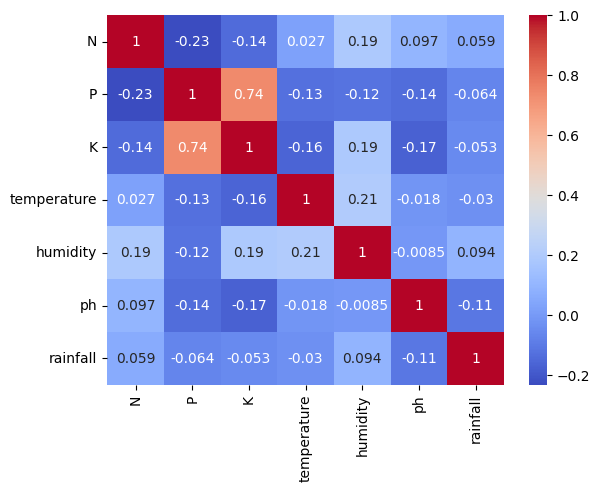

In [74]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

# Data Visualization

In [75]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

<ipython-input-76-112d7ba78cc4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


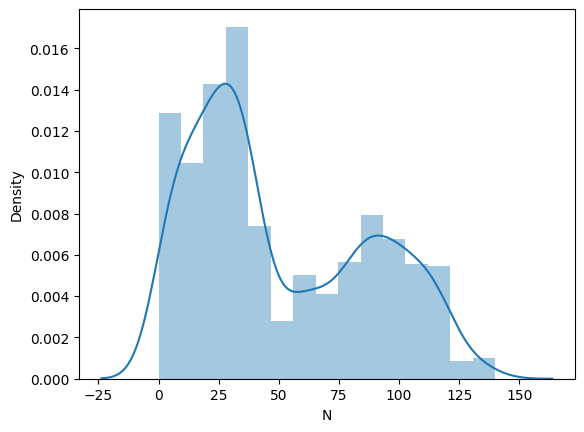

In [76]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

In [77]:
crop_copy=crop.copy()

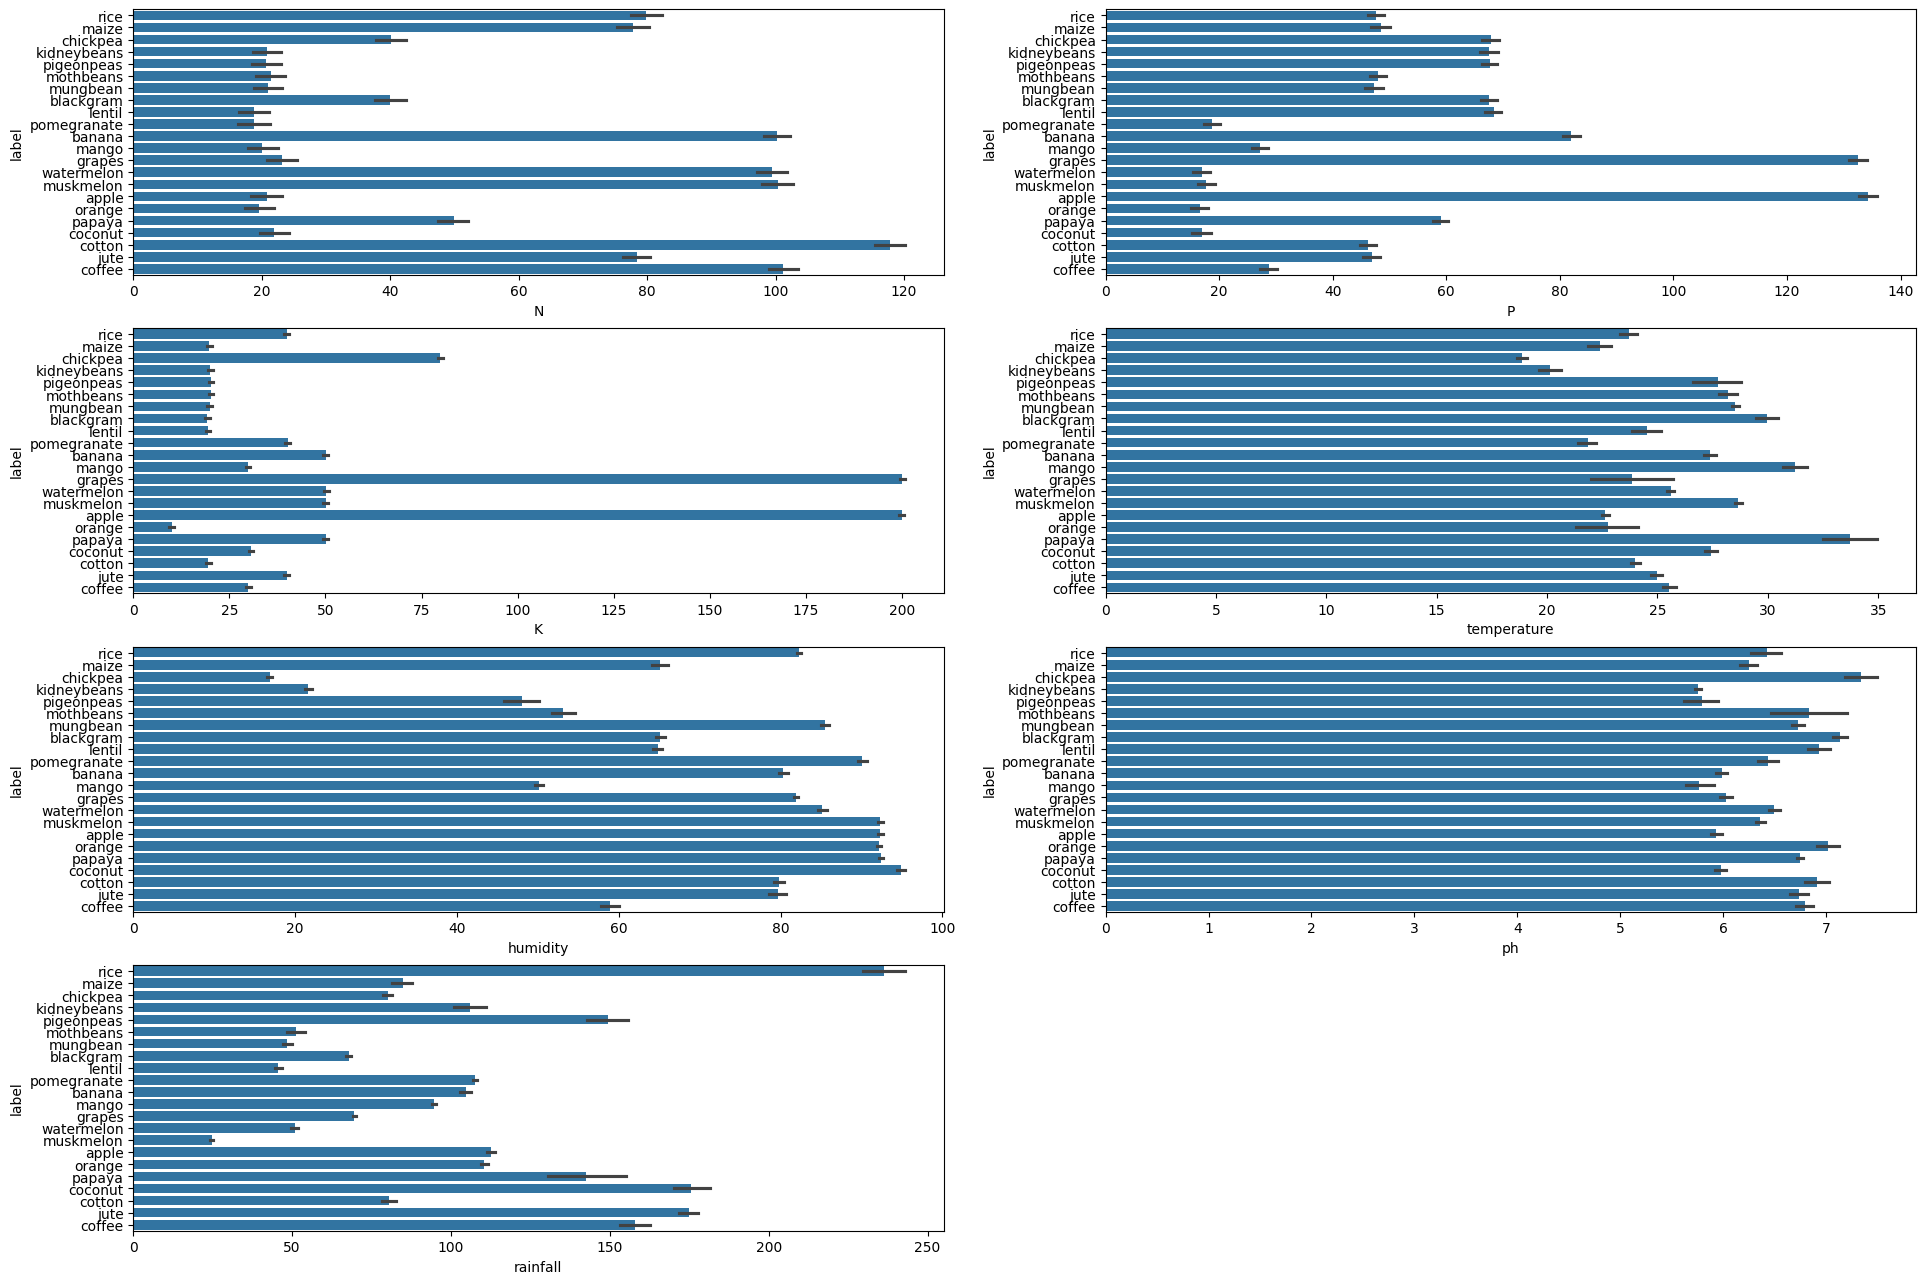

In [78]:
# Barplots.

cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph',
       'rainfall']
target = 'label'

def create_barplots(crop_copy , cols) :

    i = 1
    plt.figure(figsize = (23,20))
    for col_name in cols:
        plt.subplot(5,2,i)
        sns.barplot(data = crop_copy , x = col_name , y = target)
        i += 1

create_barplots(crop_copy , cols)

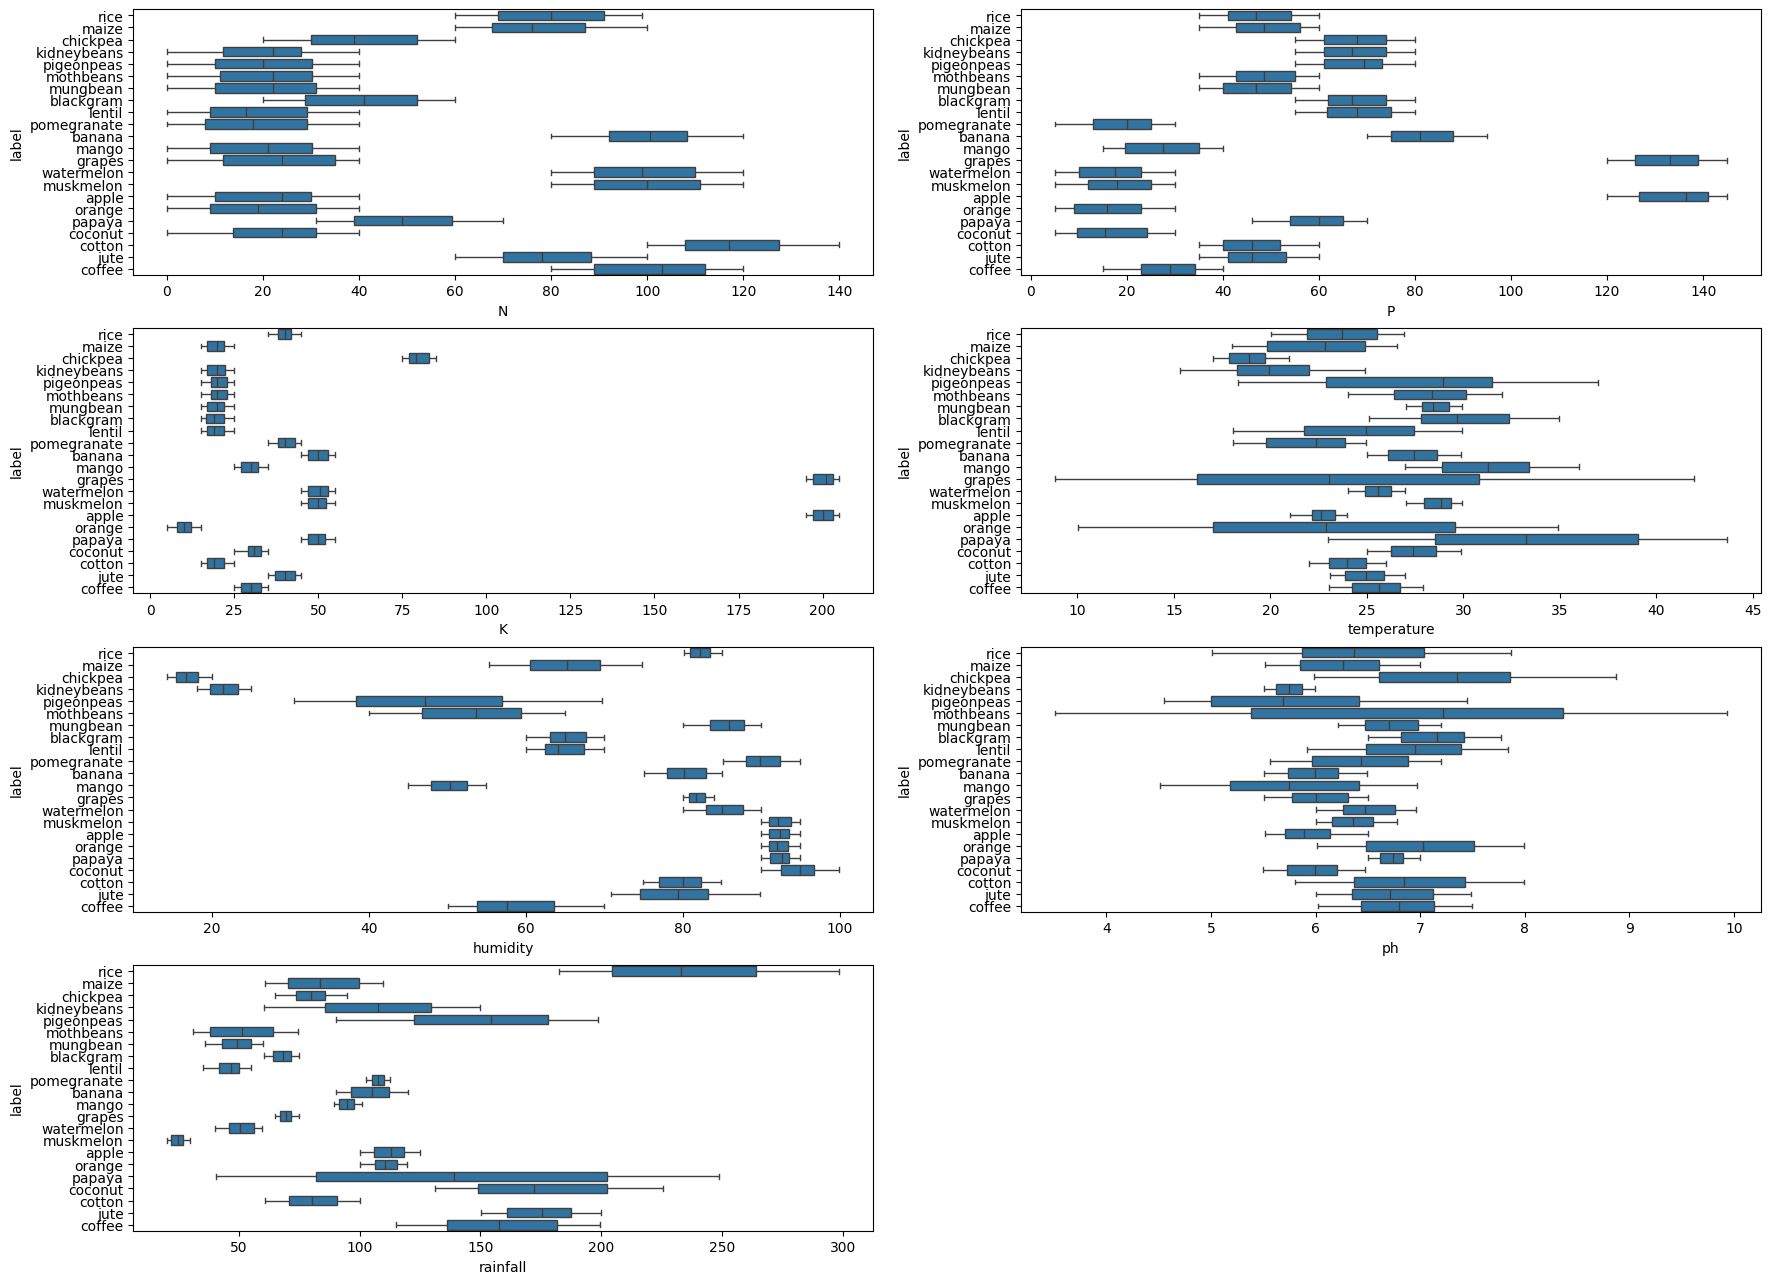

In [79]:
# Box-plots .

cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph',
       'rainfall']
target = 'label'

def create_boxplots(crop_copy , cols) :

    i = 1
    plt.figure(figsize = (21,20))
    for col_name in cols:
        plt.subplot(5,2,i)
        sns.boxplot(data = crop_copy , x = col_name , y = target)
        i += 1

create_boxplots(crop_copy , cols)

# Data Preprocessing

# Label Encoding

In [80]:
crop_dict = {
    'rice': 0,
    'maize': 1,
    'jute': 2,
    'cotton': 3,
    'coconut': 4,
    'papaya': 5,
    'orange': 6,
    'apple': 7,
    'muskmelon': 8,
    'watermelon': 9,
    'grapes': 10,
    'mango': 11,
    'banana': 12,
    'pomegranate': 13,
    'lentil': 14,
    'blackgram': 15,
    'mungbean': 16,
    'mothbeans': 17,
    'pigeonpeas': 18,
    'kidneybeans': 19,
    'chickpea': 20,
    'coffee': 21
}
crop['crop_num']=crop['label'].map(crop_dict)  #Maps each label to a number mentioned in above dictionary

In [81]:
crop.head()

N   P   K  temperature   humidity        ph    rainfall label  crop_num
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice         0
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice         0
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice         0
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice         0
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice         0

In [82]:
crop['crop_num'].value_counts()

crop_num
0     100
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
Name: count, dtype: int64

In [83]:
crop.drop(['label'],axis=1,inplace=True)
crop.head()

N   P   K  temperature   humidity        ph    rainfall  crop_num
0  90  42  43    20.879744  82.002744  6.502985  202.935536         0
1  85  58  41    21.770462  80.319644  7.038096  226.655537         0
2  60  55  44    23.004459  82.320763  7.840207  263.964248         0
3  74  35  40    26.491096  80.158363  6.980401  242.864034         0
4  78  42  42    20.130175  81.604873  7.628473  262.717340         0

# Spliting Data into Test and Train

In [84]:
X = crop.drop(['crop_num'],axis=1)
y = crop['crop_num']

In [85]:
X.shape

(2200, 7)

In [86]:
y.shape

(2200,)

In [87]:
from sklearn.model_selection import train_test_split

In [88]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
X_train.shape

(1760, 7)

In [90]:
X_test.shape

(440, 7)

In [91]:
X_train

N    P    K  temperature   humidity        ph    rainfall
1656   17   16   14    16.396243  92.181519  6.625539  102.944161
752    37   79   19    27.543848  69.347863  7.143943   69.408782
892     7   73   25    27.521856  63.132153  7.288057   45.208411
1041  101   70   48    25.360592  75.031933  6.012697  116.553145
1179    0   17   30    35.474783  47.972305  6.279134   97.790725
...   ...  ...  ...          ...        ...       ...         ...
1638   10    5    5    21.213070  91.353492  7.817846  112.983436
1095  108   94   47    27.359116  84.546250  6.387431   90.812505
1130   11   36   31    27.920633  51.779659  6.475449  100.258567
1294   11  124  204    13.429886  80.066340  6.361141   71.400430
860    32   78   22    23.970814  62.355576  7.007038   53.409060

[1760 rows x 7 columns]

In [92]:
X_test

N    P    K  temperature   humidity        ph    rainfall
1451  101   17   47    29.494014  94.729813  6.185053   26.308209
1334   98    8   51    26.179346  86.522581  6.259336   49.430510
1761   59   62   49    43.360515  93.351916  6.941497  114.778071
1735   44   60   55    34.280461  90.555616  6.825371   98.540477
1576   30  137  200    22.914300  90.704756  5.603413  118.604465
...   ...  ...  ...          ...        ...       ...         ...
59     99   55   35    21.723831  80.238990  6.501698  277.962619
71     67   45   38    22.727910  82.170688  7.300411  260.887506
1908  121   47   16    23.605640  79.295731  7.723240   72.498009
1958  116   52   19    22.942767  75.371706  6.114526   67.080226
482     5   68   20    19.043805  33.106951  6.121667  155.370562

[440 rows x 7 columns]


# Normalization of data using MinMaxScaler

In [93]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
# minmax scaler brings the data to a specific range, so that we can train data easily and efficiently
X_train_MMS = ms.fit_transform(X_train)
X_test_MMS = ms.transform(X_test)

In [94]:
X_train_MMS

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

# Training Model using minmax scalar

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train_MMS,y_train)
    ypred = md.predict(X_test_MMS)

    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9204545454545454
Naive Bayes  with accuracy : 0.9954545454545455
Support Vector Machine  with accuracy : 0.9681818181818181
K-Nearest Neighbors  with accuracy : 0.9704545454545455
Decision Tree  with accuracy : 0.9886363636363636
Random Forest  with accuracy : 0.9931818181818182
Bagging  with accuracy : 0.9863636363636363
AdaBoost  with accuracy : 0.1409090909090909
Gradient Boosting  with accuracy : 0.9818181818181818
Extra Trees  with accuracy : 0.8863636363636364


In [96]:
rfc = RandomForestClassifier()
rfc.fit(X_train_MMS,y_train)
ypred = rfc.predict(X_test_MMS)
accuracy_score(y_test,ypred)

0.9931818181818182

# Standarization

In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)

X_train_SS = sc.transform(X_train)
X_test_SS = sc.transform(X_test)

In [98]:
X_train_SS

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

# Training Models

Logistic Regression with accuracy: 0.9636
Logistic Regression with balance accuracy: 0.9661
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       1.00      0.95      0.98        21
           2       0.83      0.87      0.85        23
           3       0.94      1.00      0.97        17
           4       1.00      1.00      1.00        27
           5       0.96      0.96      0.96        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.85      1.00      0.92        11
          15       0.90      0.95      0.93

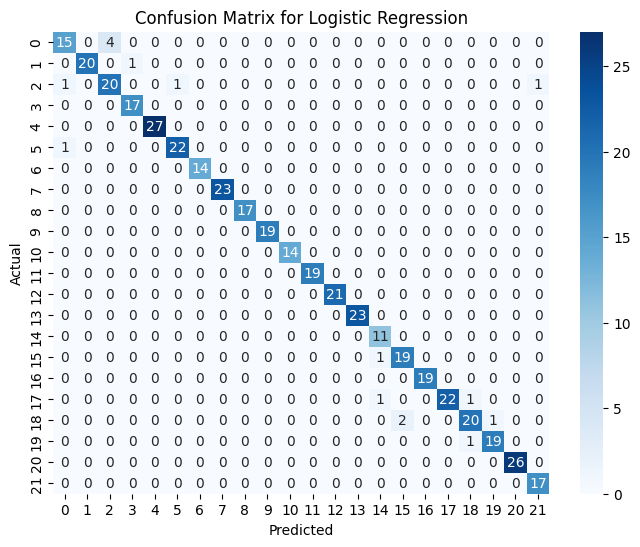

Naive Bayes with accuracy: 0.9955
Naive Bayes with balance accuracy: 0.9952
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       1.00      1.00      1.00        21
           2       0.92      1.00      0.96        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       1.00      1.00      1.00        11
          15       1.00      1.00      1.00        20
     

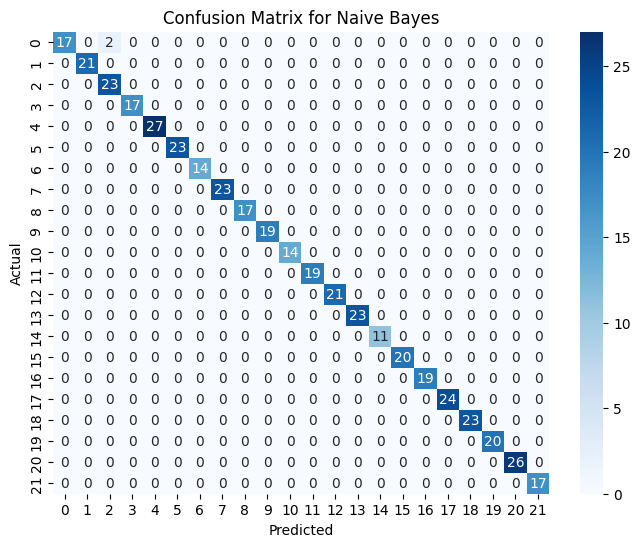

Support Vector Machine with accuracy: 0.9682
Support Vector Machine with balance accuracy: 0.9695
              precision    recall  f1-score   support

           0       0.93      0.68      0.79        19
           1       1.00      0.95      0.98        21
           2       0.78      0.91      0.84        23
           3       0.94      1.00      0.97        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.79      1.00      0.88        11
          15       1.00      0.95    

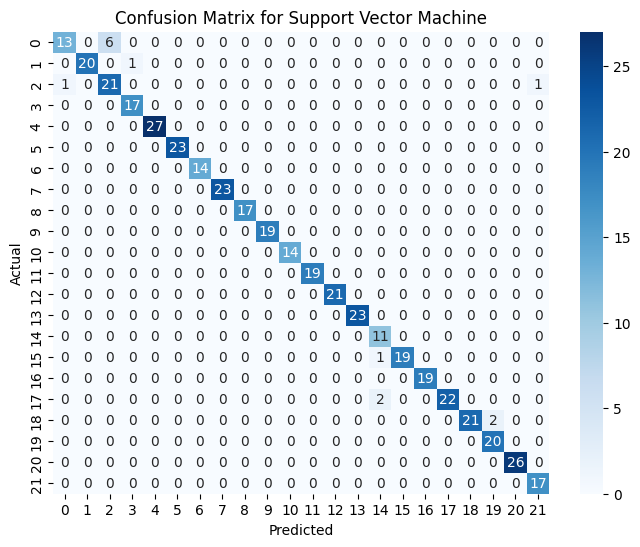

K-Nearest Neighbors with accuracy: 0.9591
K-Nearest Neighbors with balance accuracy: 0.9620
              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       1.00      0.90      0.95        21
           2       0.82      1.00      0.90        23
           3       0.89      1.00      0.94        17
           4       1.00      1.00      1.00        27
           5       1.00      0.96      0.98        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       0.90      1.00      0.95        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.69      1.00      0.81        11
          15       0.95      0.95      0.95

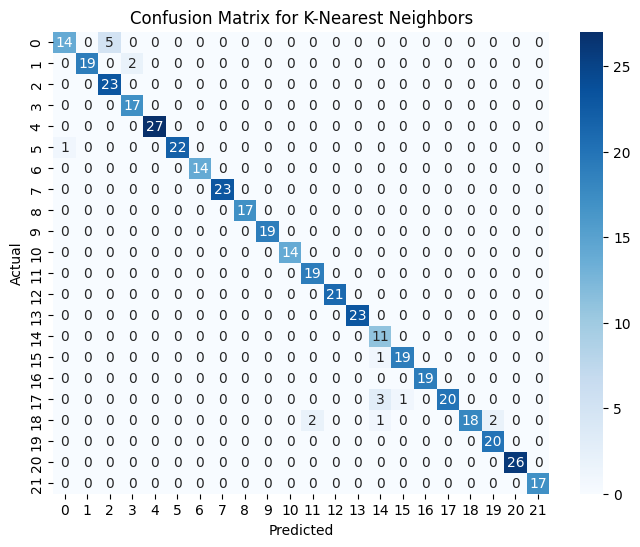

Decision Tree with accuracy: 0.9841
Decision Tree with balance accuracy: 0.9855
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        19
           1       1.00      1.00      1.00        21
           2       0.91      0.87      0.89        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.92      1.00      0.96        11
          15       0.95      1.00      0.98        20
 

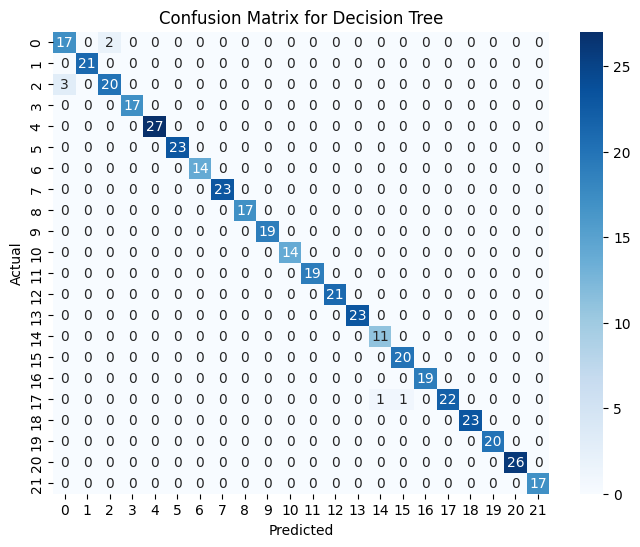

Extra Tree with accuracy: 0.8955
Extra Tree with balance accuracy: 0.8973
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.86      0.86      0.86        21
           2       0.74      0.74      0.74        23
           3       0.89      1.00      0.94        17
           4       0.93      0.96      0.95        27
           5       0.95      0.91      0.93        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       0.94      1.00      0.97        17
           9       1.00      0.95      0.97        19
          10       1.00      1.00      1.00        14
          11       0.90      0.95      0.92        19
          12       1.00      1.00      1.00        21
          13       0.96      0.96      0.96        23
          14       0.57      0.73      0.64        11
          15       0.71      0.75      0.73        20
       

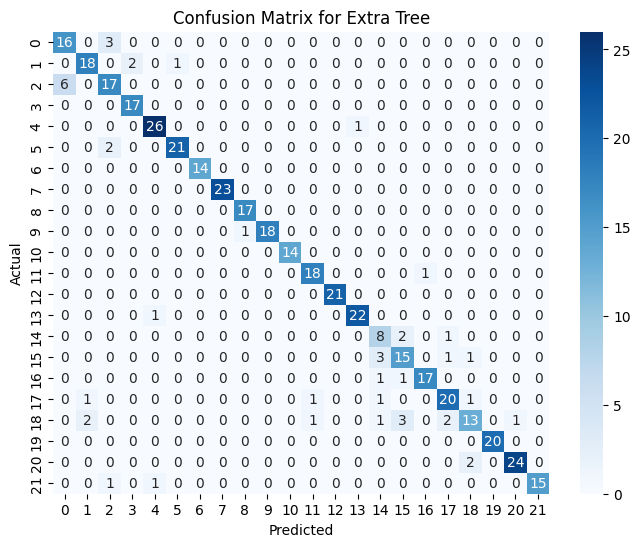

Random Forest with accuracy: 0.9932
Random Forest with balance accuracy: 0.9933
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       1.00      1.00      1.00        21
           2       0.92      1.00      0.96        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.92      1.00      0.96        11
          15       1.00      1.00      1.00        20
 

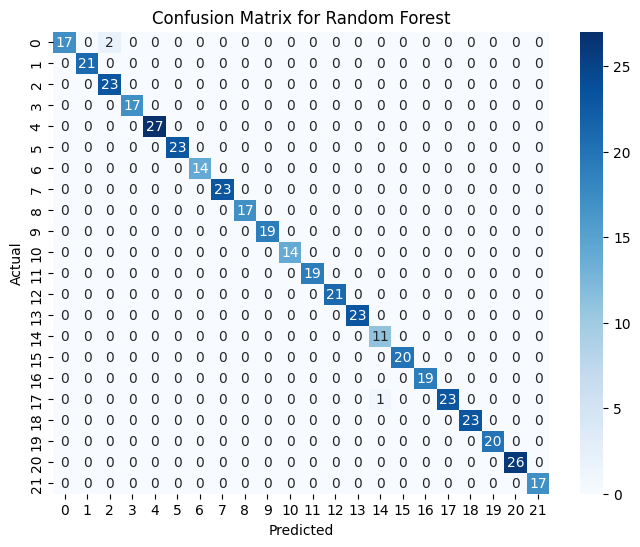

Bagging with accuracy: 0.9864
Bagging with balance accuracy: 0.9874
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        19
           1       1.00      1.00      1.00        21
           2       0.91      0.87      0.89        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.92      1.00      0.96        11
          15       1.00      1.00      1.00        20
          16 

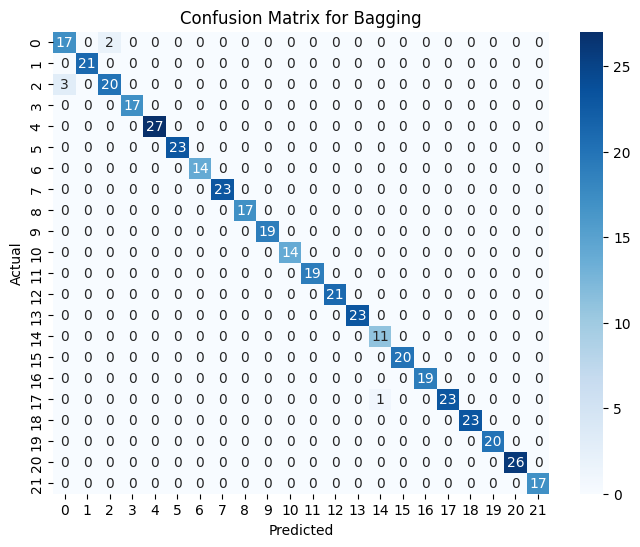

AdaBoost with accuracy: 0.1409
AdaBoost with balance accuracy: 0.1818
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00        27
           5       0.00      0.00      0.00        23
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00        23
           8       1.00      1.00      1.00        17
           9       0.00      0.00      0.00        19
          10       0.38      1.00      0.55        14
          11       0.00      0.00      0.00        19
          12       0.00      0.00      0.00        21
          13       0.00      0.00      0.00        23
          14       0.03      1.00      0.06        11
          15       0.00      0.00      0.00        20
          1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


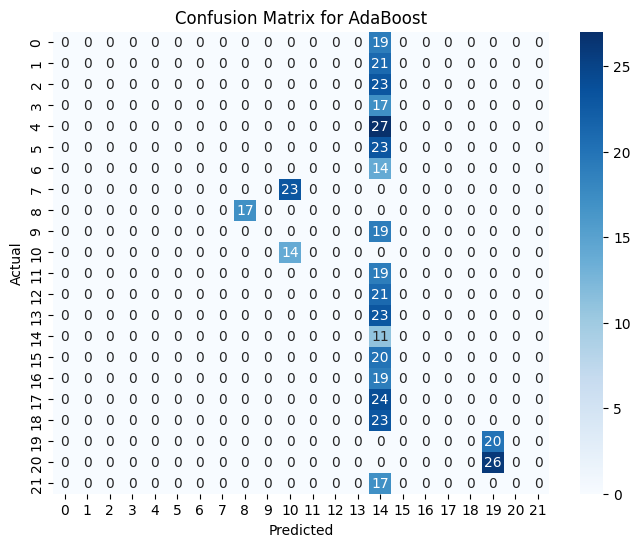

Gradient Boosting with accuracy: 0.9818
Gradient Boosting with balance accuracy: 0.9827
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        19
           1       1.00      0.95      0.98        21
           2       0.82      1.00      0.90        23
           3       0.94      1.00      0.97        17
           4       1.00      0.96      0.98        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.92      1.00      0.96        11
          15       0.95      1.00      0.98    

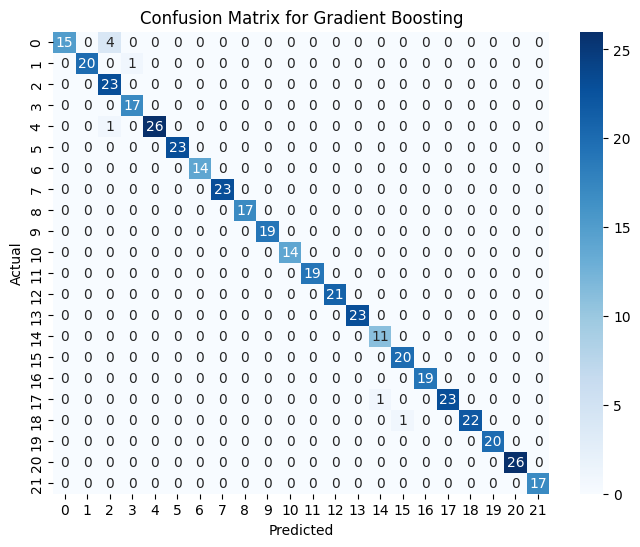

Extra Trees with accuracy: 0.9886
Extra Trees with balance accuracy: 0.9892
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       1.00      1.00      1.00        21
           2       0.92      1.00      0.96        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.79      1.00      0.88        11
          15       1.00      0.95      0.97        20
     

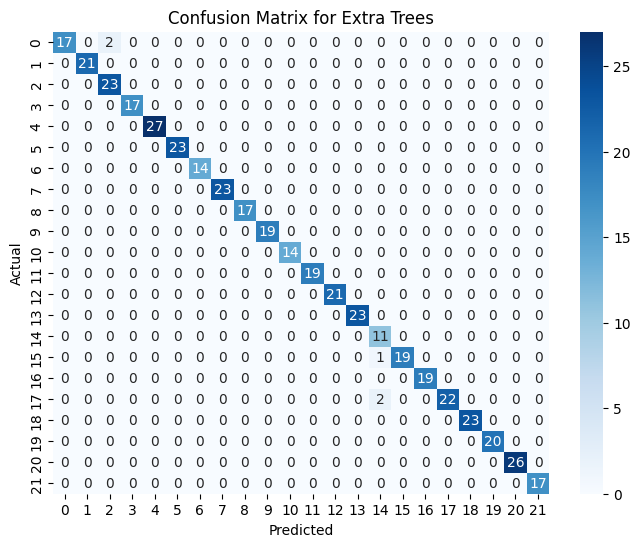

HistGradient Boosting with accuracy: 0.9841
HistGradient Boosting with balance accuracy: 0.9852
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       1.00      0.95      0.98        21
           2       0.92      0.96      0.94        23
           3       0.94      1.00      0.97        17
           4       1.00      1.00      1.00        27
           5       0.96      1.00      0.98        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      0.96      0.98        23
          14       0.92      1.00      0.96        11
          15       1.00      1.00      

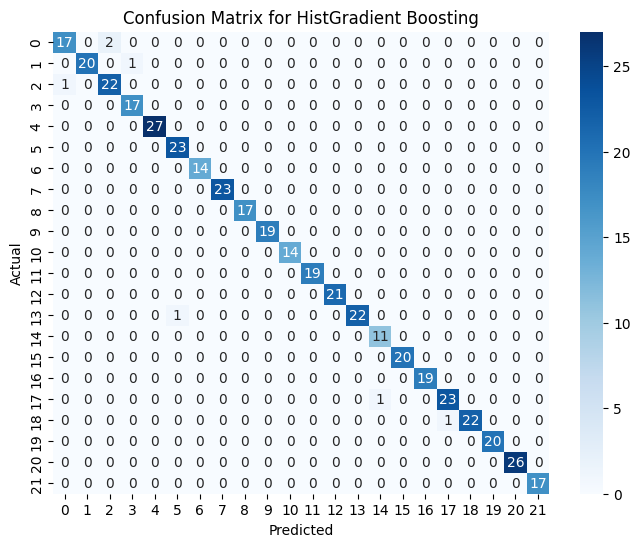

Linear Discriminant Analysis with accuracy: 0.9432
Linear Discriminant Analysis with balance accuracy: 0.9448
              precision    recall  f1-score   support

           0       0.92      0.63      0.75        19
           1       1.00      0.95      0.98        21
           2       0.77      1.00      0.87        23
           3       0.94      1.00      0.97        17
           4       1.00      1.00      1.00        27
           5       1.00      0.96      0.98        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       0.90      1.00      0.95        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.62      0.91      0.74        11
          15       0.74  

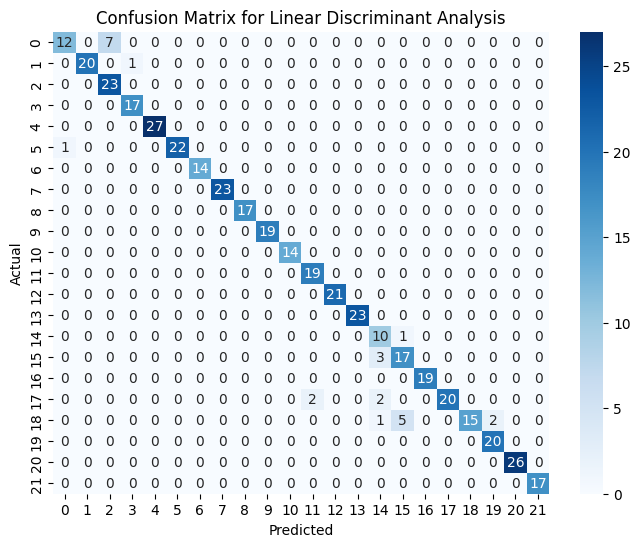

Quadratic Discriminant Analysis with accuracy: 0.9909
Quadratic Discriminant Analysis with balance accuracy: 0.9914
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       1.00      1.00      1.00        21
           2       0.92      1.00      0.96        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.85      1.00      0.92        11
          15       

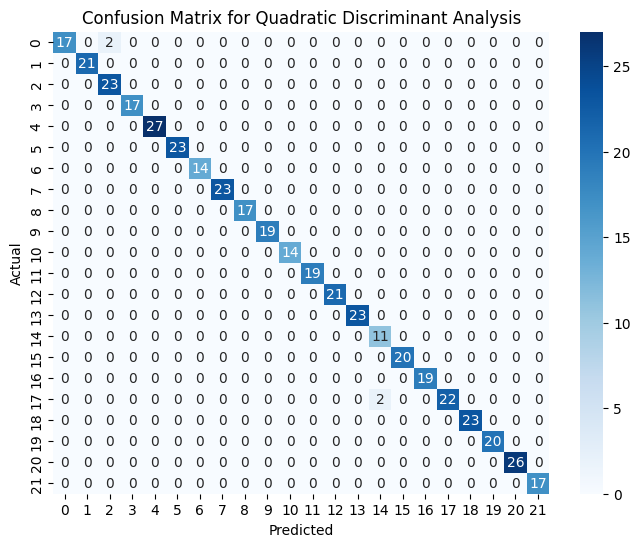

Neural Network with accuracy: 0.9795
Neural Network with balance accuracy: 0.9809
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           1       1.00      1.00      1.00        21
           2       0.88      0.96      0.92        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.73      1.00      0.85        11
          15       1.00      0.95      0.97        20

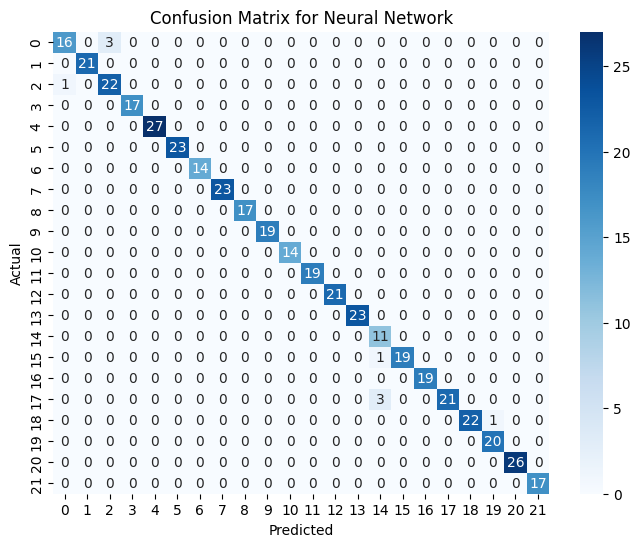

XGBoost with accuracy: 0.9864
XGBoost with balance accuracy: 0.9876
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       1.00      0.95      0.98        21
           2       0.96      0.96      0.96        23
           3       0.94      1.00      0.97        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       0.95      1.00      0.97        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.92      1.00      0.96        11
          15       0.95      1.00      0.98        20
          16 

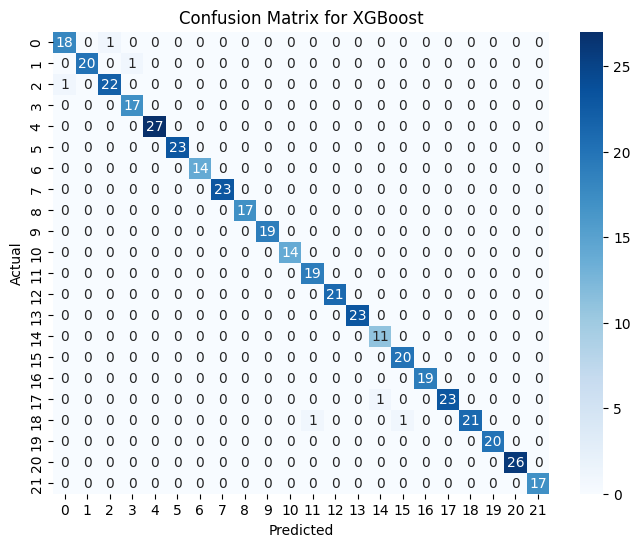

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, balanced_accuracy_score
from xgboost import XGBClassifier


# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Tree': ExtraTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'HistGradient Boosting': HistGradientBoostingClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'XGBoost': XGBClassifier(),
}

# Train and evaluate each model
for name, md in models.items():
    md.fit(X_train_SS, y_train)
    ypred = md.predict(X_test_SS)
    print(f"{name} with accuracy: {accuracy_score(y_test, ypred):.4f}")
    print(f"{name} with balance accuracy: {balanced_accuracy_score(y_test, ypred):.4f}")
    class_rep=classification_report(y_test,ypred)
    print(class_rep)
    # print(f"{name} with precison: {precision_score(y_test, ypred, average='weighted'):.4f}")
    # print(f"{name} with recall: {recall_score(y_test, ypred, average='weighted'):.4f}")
    # print(f"{name} with f1 score: {f1_score(y_test, ypred, average='weighted'):.4f}")

    cm = confusion_matrix(y_test, ypred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=md.classes_, yticklabels=md.classes_)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [100]:
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()




sc.fit(X_train)

X_train_RS = sc.transform(X_train)
X_test_RS = sc.transform(X_test)

In [101]:
X_train_RS

array([[-0.30769231, -0.875     , -0.60714286, ...,  0.39395383,
         0.19978344,  0.14798683],
       [ 0.        ,  0.7       , -0.42857143, ..., -0.37688228,
         0.73792958, -0.42640493],
       [-0.46153846,  0.55      , -0.21428571, ..., -0.58671701,
         0.88753163, -0.84090729],
       ...,
       [-0.4       , -0.375     ,  0.        , ..., -0.96996321,
         0.04397836,  0.10198816],
       [-0.4       ,  1.825     ,  6.17857143, ..., -0.01503972,
        -0.07468297, -0.39229211],
       [-0.07692308,  0.675     , -0.32142857, ..., -0.6129333 ,
         0.59581067, -0.7004471 ]])

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Tree': ExtraTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'HistGradient Boosting': HistGradientBoostingClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Neural Network': MLPClassifier(max_iter=1000),
}

# Train and evaluate each model
for name, md in models.items():
    md.fit(X_train_RS, y_train)
    ypred = md.predict(X_test_RS)
    print(f"{name} with accuracy: {accuracy_score(y_test, ypred):.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression with accuracy: 0.9636
Naive Bayes with accuracy: 0.9955
Support Vector Machine with accuracy: 0.9705
K-Nearest Neighbors with accuracy: 0.9659
Decision Tree with accuracy: 0.9864
Extra Tree with accuracy: 0.9227
Random Forest with accuracy: 0.9932
Bagging with accuracy: 0.9886
AdaBoost with accuracy: 0.1409
Gradient Boosting with accuracy: 0.9818
Extra Trees with accuracy: 0.9841
HistGradient Boosting with accuracy: 0.9841
Linear Discriminant Analysis with accuracy: 0.9432
Quadratic Discriminant Analysis with accuracy: 0.9909
Neural Network with accuracy: 0.9750


In [103]:
from sklearn.preprocessing import PowerTransformer

sc = PowerTransformer(method='yeo-johnson')  # or method='box-cox' for positive data

sc.fit(X_train)

X_train_MAS = sc.transform(X_train)
X_test_MAS = sc.transform(X_test)


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Tree': ExtraTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'HistGradient Boosting': HistGradientBoostingClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Neural Network': MLPClassifier(max_iter=1000),
}

# Train and evaluate each model
for name, md in models.items():
    md.fit(X_train_MAS, y_train)
    ypred = md.predict(X_test_MAS)
    print(f"{name} with accuracy: {accuracy_score(y_test, ypred):.4f}")

Logistic Regression with accuracy: 0.9568
Naive Bayes with accuracy: 0.9955
Support Vector Machine with accuracy: 0.9750
K-Nearest Neighbors with accuracy: 0.9750
Decision Tree with accuracy: 0.9818
Extra Tree with accuracy: 0.8818
Random Forest with accuracy: 0.9932
Bagging with accuracy: 0.9909
AdaBoost with accuracy: 0.1409
Gradient Boosting with accuracy: 0.9818
Extra Trees with accuracy: 0.9909
HistGradient Boosting with accuracy: 0.9841
Linear Discriminant Analysis with accuracy: 0.9455
Quadratic Discriminant Analysis with accuracy: 0.9886
Neural Network with accuracy: 0.9750


# Predictive System

In [105]:
# def recommendation(N,P,k,temperature,humidity,ph,rainfal):
#     features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
#     transformed_features = ms.fit_transform(features)
#     transformed_features = sc.fit_transform(transformed_features)
#     prediction = rfc.predict(transformed_features).reshape(1,-1)

#     return prediction[0]

In [106]:
def recommendation(N, P, k, temperature, humidity, ph, rainfal, ms, sc, rfc):
    # Create a 2D array with the input features
    features = np.array([[N, P, k, temperature, humidity, ph, rainfal]])

    # Transform the features using the pre-fitted Min-Max Scaler
    transformed_features = ms.transform(features)

    # Further transform the features using the pre-fitted Standard Scaler
    transformed_features = sc.transform(transformed_features)

    # Predict using the pre-trained Random Forest Classifier
    prediction = rfc.predict(transformed_features).reshape(1, -1)

    # Return the first element of the prediction
    return prediction[0]


In [107]:
N = 40
P = 72
k = 77
temperature = 17
humidity = 16
ph = 7
rainfall = 88

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall,ms,sc,rfc)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

print(predict)
if predict[0] in crop_dict:
    crop_str = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop_str))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

[19]
Pigeonpeas is a best crop to be cultivated 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [108]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))

In [109]:
# Function to remove outliers
def remove_outliers(crop):
    Q1 = crop.quantile(0.25)
    Q3 = crop.quantile(0.75)
    IQR = Q3 - Q1
    df_filtered = crop[~((crop < (Q1 - 1.5 * IQR)) | (crop > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_filtered

df_filtered = remove_outliers(crop)
print("Data before removing outliers:")
print(crop)
print("Data after removing outliers:")
print(df_filtered)


Data before removing outliers:
        N   P   K  temperature   humidity        ph    rainfall  crop_num
0      90  42  43    20.879744  82.002744  6.502985  202.935536         0
1      85  58  41    21.770462  80.319644  7.038096  226.655537         0
2      60  55  44    23.004459  82.320763  7.840207  263.964248         0
3      74  35  40    26.491096  80.158363  6.980401  242.864034         0
4      78  42  42    20.130175  81.604873  7.628473  262.717340         0
...   ...  ..  ..          ...        ...       ...         ...       ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507        21
2196   99  15  27    27.417112  56.636362  6.086922  127.924610        21
2197  118  33  30    24.131797  67.225123  6.362608  173.322839        21
2198  117  32  34    26.272418  52.127394  6.758793  127.175293        21
2199  104  18  30    23.603016  60.396475  6.779833  140.937041        21

[2200 rows x 8 columns]
Data after removing outliers:
        N   P   K  tempera

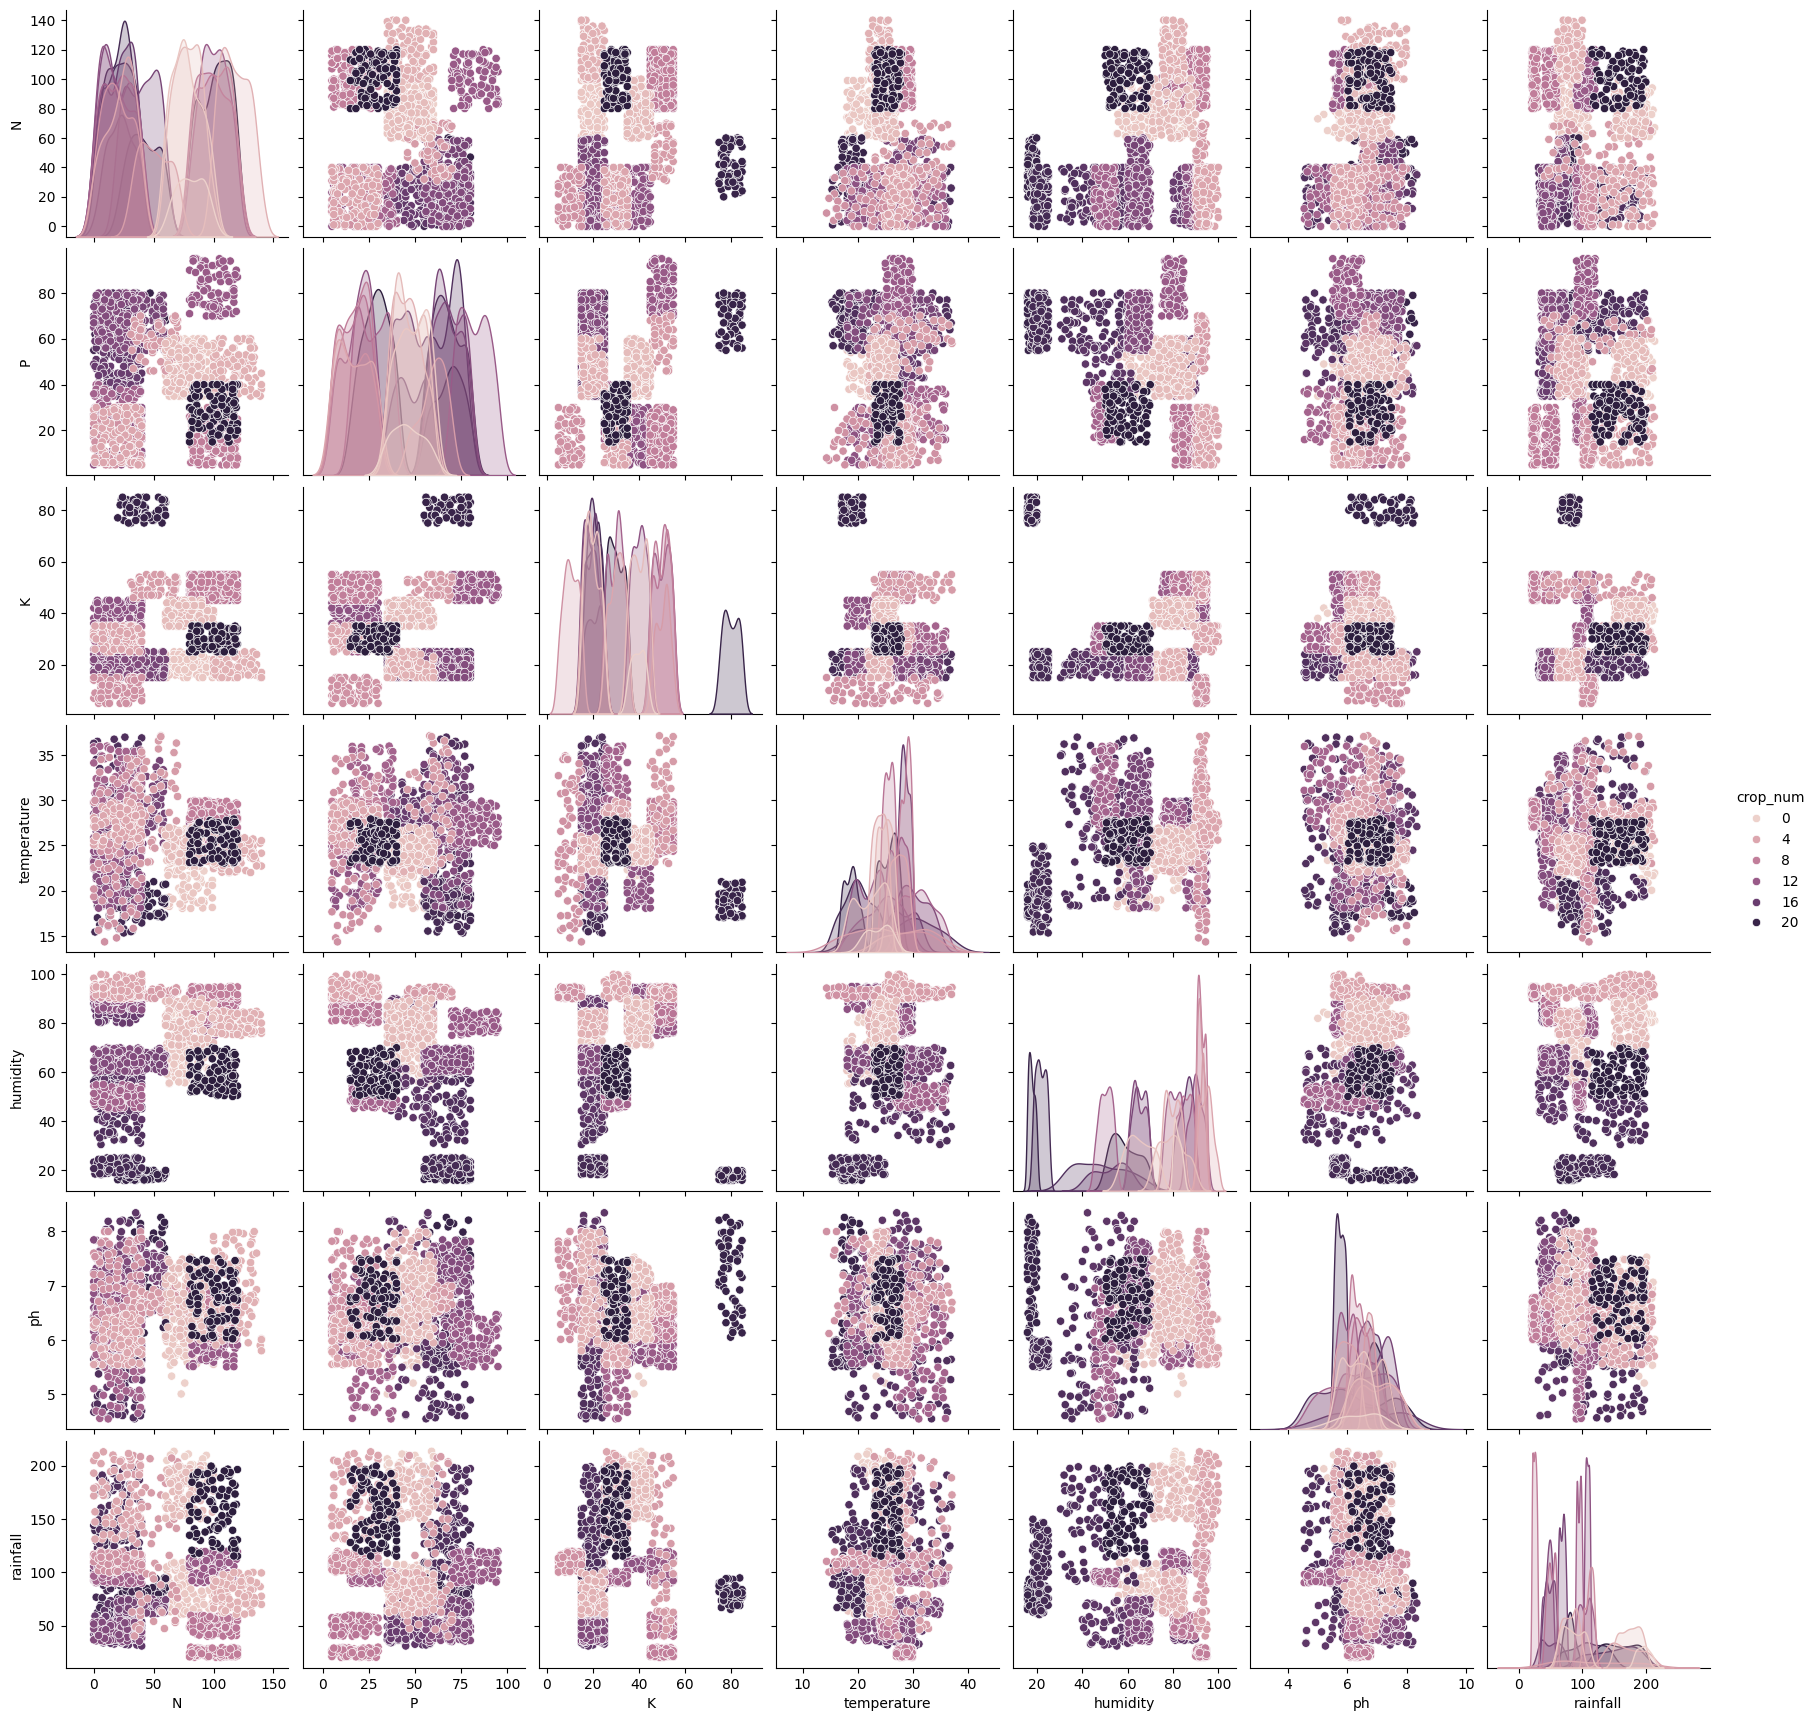

In [110]:
# Visualize data distribution
sns.pairplot(df_filtered, hue='crop_num')
plt.show()

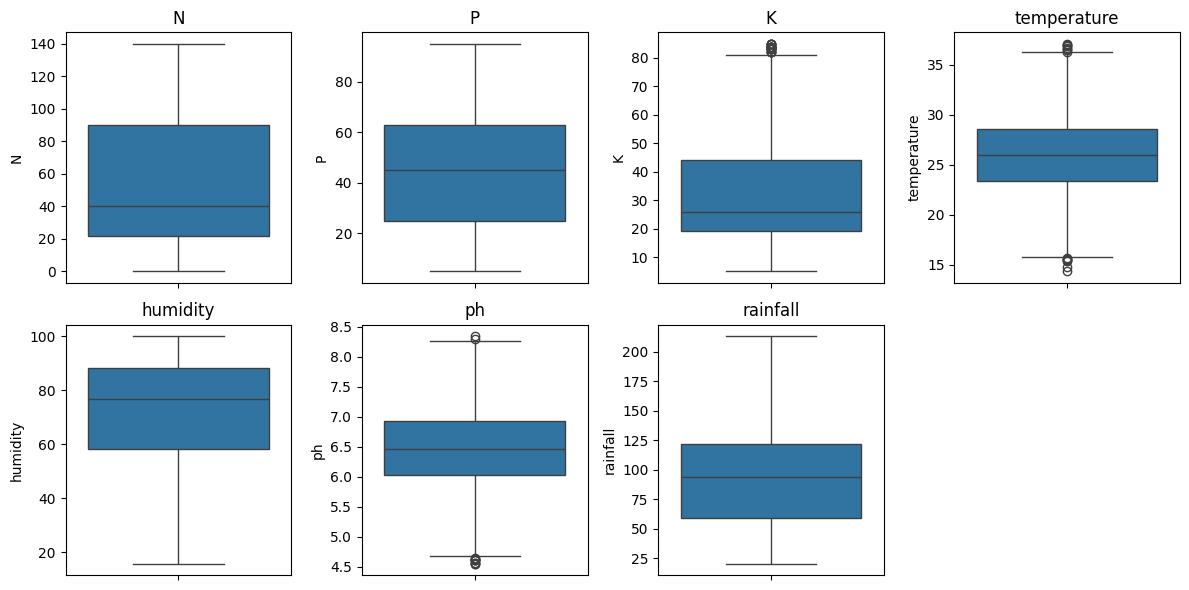

In [111]:

# Boxplot for each feature
plt.figure(figsize=(12, 6))
for i, column in enumerate(df_filtered.columns[:-1], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df_filtered[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [112]:
def label_crop(crop):
    if crop in ['pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'coffee']:
        return 'Fruit'
    elif crop in ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil']:
        return 'Grain'
    return 'Fiber'

In [113]:
def get_sowing_season(crop):
    return 'Summer' if crop in ['rice', 'maize', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'kidneybeans', 'cotton', 'jute', 'watermelon', 'muskmelon','coffee'] else 'Winter'

In [114]:
crop_copy['Crop_Type'] = crop_copy.label.apply(lambda row: label_crop(row))
crop_copy['Sown_Season'] = crop_copy.label.apply(lambda row: get_sowing_season(row))

In [115]:
crop_copy.Crop_Type.value_counts()

Crop_Type
Fruit    1100
Grain     900
Fiber     200
Name: count, dtype: int64

In [116]:
crop_copy.Sown_Season.value_counts()

Sown_Season
Summer    1200
Winter    1000
Name: count, dtype: int64